<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Proportional-Integral-(PI)-Control" data-toc-modified-id="Proportional-Integral-(PI)-Control-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Proportional-Integral (PI) Control</a></span><ul class="toc-item"><li><span><a href="#Example:-PI-control-design-using-the-direct-method" data-toc-modified-id="Example:-PI-control-design-using-the-direct-method-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example: PI control design using the direct method</a></span></li></ul></li><li><span><a href="#Common-Controller-Design-Metrics-for-Closed-Loop-Systems-Displaying-Underdamped-Second-Order-Behavior" data-toc-modified-id="Common-Controller-Design-Metrics-for-Closed-Loop-Systems-Displaying-Underdamped-Second-Order-Behavior-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Common Controller Design Metrics for Closed Loop Systems Displaying Underdamped Second-Order Behavior</a></span><ul class="toc-item"><li><span><a href="#Percent-Overshoot" data-toc-modified-id="Percent-Overshoot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Percent Overshoot</a></span></li><li><span><a href="#Settling-Time" data-toc-modified-id="Settling-Time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Settling Time</a></span></li></ul></li><li><span><a href="#Proportional-Derivative-(PD)-Control" data-toc-modified-id="Proportional-Derivative-(PD)-Control-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Proportional-Derivative (PD) Control</a></span><ul class="toc-item"><li><span><a href="#Example:-PD-control-design-using-the-direct-method" data-toc-modified-id="Example:-PD-control-design-using-the-direct-method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example: PD control design using the direct method</a></span></li></ul></li><li><span><a href="#Exercise:-Controller-Design.-Due-Friday,-October-11-by-midnight" data-toc-modified-id="Exercise:-Controller-Design.-Due-Friday,-October-11-by-midnight-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise: Controller Design. Due Friday, October 11 by midnight</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Model Development</a></span></li><li><span><a href="#Controller-Design" data-toc-modified-id="Controller-Design-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Controller Design</a></span></li><li><span><a href="#Controller-Validation:-Simulation" data-toc-modified-id="Controller-Validation:-Simulation-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Controller Validation: Simulation</a></span></li></ul></li></ul></li></ul></div>

# Challenge

Design a closed loop feedback controller that can control both the system's response time and its steady state error.

# Proportional-Integral (PI) Control

The proportional control term $P(s)$ looks at how far our system is from where we want it to be, but sometimes (for example, for a [first-order plant](../W05A_Control_PIDFundamentals/W05A_Control_PIDFundamentals.ipynb#Example)), this is not enough to ensure that our system will be able to track a step input without any steady-state error. The proportional-integral controller solves this problem by looking at how *long* our system has been away from $r(s)$ as well as how far it is at any given moment. The controller transfer function for a PI controller is:

\begin{equation}
C(s) = K_p+K_i\frac{1}{s}
\end{equation}

This controller, like the proportional controller, gives an input to the system that is proportional to the error signal $e(s)$, but the additional term $\frac{K_i}{s}$ does something different. It pushes on the system proportional to the *integral of the error.* Think of it this way-- if the system were sitting some constant distance away from the desired value $r(s)$, the integral of the error would increase steadily, and the $K_i$ term would push harder and harder to try to eliminate the error. 

Let's look at an example of PI control applied to a first order system.

**Note: In the following figure, the plant is labeled $P(s)$. You will, in your travels, likely see plant transfer functions denoted by many different letters.**

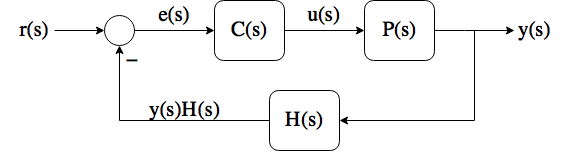

## Example: PI control design using the direct method

Suppose we have the same first order plant we worked with in the example from the [last reading](../W05A_Control_PIDFundamentals/W05A_Control_PIDFundamentals.ipynb#Example):

\begin{equation}
P(s) = \frac{y(s)}{r(s)}= \frac{1}{s+1}
\end{equation}

We wish to control this system's output, and we will assume that $H(s)=1$ in the feedback path of the "canonical block diagram" for feedback control, which means that any sensor needed to measure the system's output has a gain of 1 and no dynamics or filtering to consider. The plant transfer function has one eigenvalue at $s=-1$. In the last reading, we saw that a proportional controller could not achieve perfect tracking for this first-order plant without setting $K_p=\infty$, but that we could arbitrarily move the closed-loop system's eigenvalue to any real value we wanted, to achieve a desired settling time. To see how and/or if this might change using a proportional-integral controller, we will first compute the closed-loop transfer function $G_{cl}(s)=\frac{y(s)}{r(s)}$.

\begin{equation}
G_{cl}(s) = \frac{PC}{1+PCH}
\end{equation}

This leads to the following closed-loop transfer function:

\begin{equation}
G_{cl}(s) = \frac{\left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}{1+ \left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}
\end{equation}

After clearing the fractions, this leads to the following simplified form of $G_{cl}(s)$:

\begin{equation}
G_{cl}(s) = \frac{\left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}{1+ \left(K_p + \frac{K_i}{s}\right)\frac{1}{s+1}}\cdot \frac{s^2+s}{s^2+s} = \frac{K_ps+K_i}{s^2+(K_p+1)s + K_i}
\end{equation}

Just by looking at the form of the closed-loop transfer function, the following can be ascertained:

1. The closed-loop transfer function (CLTF) has a *zero* even though the plant transfer function did not.
2. The closed-loop system is 2nd order, even though the plant transfer function was first order! PI control always adds a pole to the system because of the integral action, which stores energy in the act of "remembering" how far away the system's output $y(s)$ has been over time from the reference input $r(s)$.
4. For this particular plant, positive values of $K_p$ and $K_i$ will maintain system stability.
3. The final value theorem predicts that the output $y(s)$ will match the reference input $r(s)$ for a step change in $r(s)$ for *any positive value of* $K_i$ for this system (check this yourself!).

What's more, if we look at the closed-loop system eigenvalues, which we can find using the quadratic formula:

\begin{equation}
s = \frac{-\left(K_p+1\right) \pm \sqrt{(K_p+1)^2-4K_i}}{2}
\end{equation}

We can see that we have full control, through $K_p$ and $K_i$, of both the real and complex part of our eigenvalues, meaning that if the desired behavior is underdamped we have full control over both $\zeta$ and $\omega_n$. This means that although we've increased the system order by 1 in adding integral action to our control system, we have retained the ability to fully manipulate the system's dynamics for performance goals like rise time, settling time, damping ratio, natural frequency, etc. 

But how might we know what to set our desired $\zeta$ and $\omega_n$ to? Some common performance goals for systems that display underdamped second-order behavior under closed loop control are given below. Note that because PI control adds a pole to your system, all PI-controlled closed-loop systems will be at least second order. 

# Common Controller Design Metrics for Closed Loop Systems Displaying Underdamped Second-Order Behavior

While minimizing steady-state error is nearly always a goal of a feedback control system, controlling its *transient* behavior is also vital to achieving good performance.

Many times, attempting to make a closed-loop system settle quickly to its steady state means that the engineer will need to live with at least some oscillation. Finding the "right" damping ratio $\zeta$ and natural frequency $\omega_n$ for a closed loop system that will act like an underdamped second-order system is often a delicate balance between different design goals.

The two most common design metrics we will use in ME480 for closed loop systems that display underdamped second-order behavior can include, but are not limited to, the following quantities:

## Percent Overshoot

Often, it is important to limit the system's overshoot in response to a step input. [Percent overshoot](https://en.wikipedia.org/wiki/Overshoot_(signal)#:~:text=For%20a%20step%20input%2C%20the,overshoot%20in%20an%20electronics%20context.) can be found approximately for a standard-form, second-order system as:

$$PO = 100e^{-\frac{\pi \zeta}{\sqrt{1-\zeta^2}}}$$

This formula can be manipulated to produce a goal for the damping ratio $\zeta$ of the closed-loop control system's dominant eigenvalue pair.

## Settling Time

Often, the speed at which a system reaches steady state is important. An approximate formula for the $2\%$ [settling time](https://en.wikipedia.org/wiki/Settling_time) of a system that displays underdamped second order behavior can be found as:

$$t_{s,2\%} = \frac{4}{\zeta\omega_n}$$

This can be used to help determine a goal for a closed-loop system's damping ratio $\zeta$ if a desired $\omega_n$ is known, or to determine $\omega_n$ if the goal for $\zeta$ is known.



PI control is guaranteed to produce at least second-order behavior (since it adds a pole). It certainly isn't *always* the case that an engineer will want the closed-loop poles to be oscillatory. If overdamped behavior is desired, a control engineer can design gains $k_p$ and $k_i$ such that the slower of the system's two [effective time constants](../W03A_Modeling_MathematicalTools/Week03A_Modeling_MathematicalTools.ipynb#Overdamped-systems) has a desirable value.

Another type of control that is common, but nearly always with plant models that *begin* as second-order or higher systems, is called Proportional-Derivative (PD) control, which is introduced below.

# Proportional-Derivative (PD) Control

The transfer function for PD control is, in general,

\begin{equation}
C(s) = K_p + K_ds
\end{equation}

In contrast to the PI controller, which reacts to both the magnitude of the error the area under the error curve $e(t)$ as the system attempts to reach steady state, the PD controller reacts to the error through $K_p$ and the *speed at which the error signal is changing* through $K_d$, which reacts proportionally to the error signal's time derivative. You might think of this as a type of "virtual damper" the way you might think of $K_p$ as a virtual spring. PD control is very popular for second and higher order systems. At this point in the course, we're still limited to analyzing the behavior of a closed-loop system by directly studying the solutions to its characteristic equation, so let's look at a second order example.


## Example: PD control design using the direct method

Consider the following system, in which a mass attached to ground by viscous damping is moved by a force $F_i$. This is a pretty generic system, but it can represent lots of things... a vehicle subject to rolling resistance, or a glass sliding along a bar, for example.

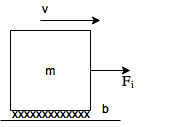

If we were to develop a physics-based model for this system using Newton's Second Law ($\sum F = m\dot{v}$), we might get a differential equation like:

$$ F_i = m\dot{v} + bv$$

Where $m$ is the block's mass and $b$ is the damping constant between the mass and ground. This model is incidentally in our standard form with $a_0 = b$ and $a_1=m$, but we will leave the physical parameters in the model for the remainder of this example.

By taking the Laplace transform of both sides of the equation, we could turn this model into a transfer function that looks something like the transfer function below assuming an ideal force source $F_i$ as our input and the mass's velocity $v$ as our output:

\begin{equation}
P_v(s) = \frac{v(s)}{F_i(s)} = \frac{\frac{1}{m}}{s+\frac{b}{m}}
\end{equation}

If we wish to control the mass's position rather than its velocity, we can simply integrate this transfer function to obtain a model of the mass's *position* in response to the force input:

\begin{equation}
P_p(s) = \frac{x(s)}{F_i(s)} = \frac{\frac{1}{m}}{s^2 + \frac{b}{m}s}
\end{equation}

Let's try a PD controller as our controller transfer function $C(s)$, and let's assume once again that the sensor or feedback transfer function $H(s)=1$. Computing the transfer function $G_{cl}(s) = \frac{x(s)}{r(s}$, where $r(s)$ is our position request for the controlled mass, we get:

\begin{equation}
G_{cl}(s) = \frac{\frac{K_p+K_ds}{ms^2+bs}}{1+\frac{K_p+K_ds}{ms^2+bs}}
\end{equation}

Clearing fractions gives us our final closed-loop transfer function from $r(s)$ to $x(s)$:

\begin{equation}
G_{cl}(s) = \frac{K_p+K_ds}{ms^2+(b+K_d)s + Kp}
\end{equation}

Similarly to the PI controller for our first order system, the PD controller on our simple example second order system adds a zero, ensures zero steady-state error for a step on $r(s)$, and allow the control of both the real and complex part of our eigenvalues.  However, **PD control does not guarantee of zero steady-state error for *every possible* second order system!** It is possible to have a situation where a PD controller does not allow for perfect tracking for a step input! **This will occur for any system that would not achieve perfect steady state tracking of a step input under P control.** The $k_d$ term is always multiplied by $s$, so it will not show up in the FVT calculation for a step input. The bottom line is that you should be checking the FVT for any controller you design to make sure it does what you expect.

